## Project Description

In this project we will prepare some market research on resturants in LA, focousing on the current market conditions. Specifically we are interested to find out and demonstrate to potential investors wether we will be able to maintain success in a small robot run cafe in LA when the novelty of robot waiters wears off.

### Table of Contents

* [Data preprocessing](#data_preprocessing)
* [Data analysis](#Data_analysis)
    * [Proportions of various types of establishments](#proportions_types)
    * [Proportions of chain and nonchain establishments](#proportions_chain_nonchain)
    * [Which type of establishment is typically a chain](#establishment_chain)
    * [What characterizes chains: number of seats](#characterizes_chains_seats)
    * [Average number of seats for each type of restaurant](#average_seats)    
    * [Top ten streets by number of restaurants](#top_ten_streets)
    * [Number of streets with one restaurant only](#one_restaurant)
    * [Distribution of seats for streets with a lot of restaurants](#street_seat_distribution)
    * [Overall conclusion](#overall_conclusion)
* [link to the presentation](#presentation)

### All imports sorted alphabetically

In [1]:
import matplotlib as matp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns

### Data Preprocessing  <a class="anchor" id="data_preprocessing"></a>

In [2]:
resturants= pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
#Lets check the size of the data
resturants.shape

(9651, 6)

In [4]:
#lets print the first 5 rows of our data
resturants.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
#and the last 5 rows 
resturants.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [6]:
#lets look at the basic info rgarding our data 
resturants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [7]:
#lets varify the mssing values in our data
resturants.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [8]:
#lets take a closer look at our rows with missing data 
null_data = resturants[resturants.isnull().any(axis=1)]
null_data

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [9]:
#based on google search none of the above seems to be chains and are those filled with 'FALSE'
resturants['chain'] = resturants['chain'].fillna(value ='False')
#and lets double check that the missing values were filled 
resturants.isnull().sum().sum()

0

In [10]:
#and lets change the chain data to Bolean data type seeming it consists of 2 values only -true and false
resturants['chain']=resturants['chain'].astype('bool')

In [11]:
resturants['chain'].value_counts()

False    5972
True     3679
Name: chain, dtype: int64

In [12]:
#now lets check for duplicates in our data
np.where(resturants.duplicated().values)

(array([], dtype=int64),)

**From a quick look at the data we can see that:**
- Data consists of 9650 rows and 6 columns.
- Data had 3 missing values in the 'chain' column- based on the numbers per columns in the info output and isnull method. Based on google search none of them were chains were thus filled with 'FALSE'
- There are no duplicates in our data.
- Data type has been corrected for chain column.

### Data analysis <a class="anchor" id="Data_analysis"></a>

#### proportions of the various types of establishments <a class="anchor" id="proportions_types"></a>

In [13]:
#lets see how manny establishments we have in total and save this to a variable
total_establishments= resturants['object_type'].count()
#9651 establishments in total
#lets find out how many establishments we have for each type of establishment
establishment_types=resturants[['object_type','id']].groupby('object_type').count().sort_values(by='id').reset_index()
establishment_types.columns= ['object_type','count']
#lets add the porportion in percentage to our table
establishment_types['porportion_percentage'] = (establishment_types['count']/total_establishments)*100
#and lets round it to 1 decimal place
establishment_types['porportion_percentage']=establishment_types['porportion_percentage'].round(2)
establishment_types

,object_type,count,porportion_percentage
0,Bakery,283,2.93
1,Bar,292,3.03
2,Pizza,320,3.32
3,Cafe,435,4.51
4,Fast Food,1066,11.05
5,Restaurant,7255,75.17


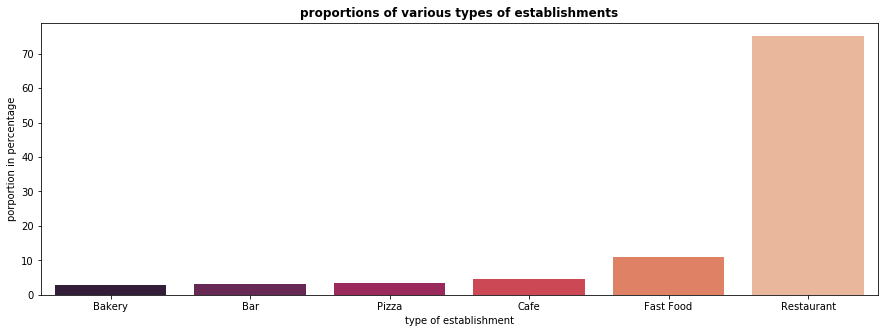

In [14]:
#now lets visualize the porportion of establishments 
fig, ax=plt.subplots(figsize=(15,5))
ax = sns.barplot(x="object_type", y="porportion_percentage", data=establishment_types, palette="rocket") 
plt.title('proportions of various types of establishments', fontweight='bold')
plt.ylabel("porportion in percentage")
plt.xlabel('type of establishment')
plt.show()

We see that 7255 establishments in LA, which is 75% of the total establishments, are restaurants. Whilst the remaining 5 establishmenst do not exceed 11%. 

#### proportions of chain and nonchain establishments <a class="anchor" id="proportions_chain_nonchain"></a>

In [15]:
#now lets look at the proportion of non-chain to chain establishments
chain_nonchain=resturants[['chain','id']].groupby('chain').count().reset_index()
chain_nonchain.columns= ['chain','count']
total_chain= resturants['chain'].count()
chain_nonchain['porportion_percentage'] = (chain_nonchain['count']/total_chain)*100
chain_nonchain['porportion_percentage']=chain_nonchain['porportion_percentage'].round(2)
chain_nonchain

,chain,count,porportion_percentage
0,False,5972,61.88
1,True,3679,38.12


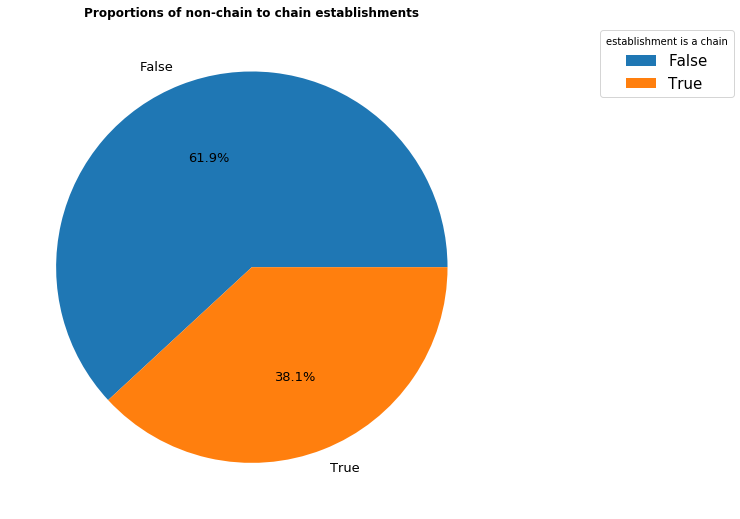

In [16]:
#now lets visualize this data
#create a dictionary
chain = resturants["chain"].value_counts().to_dict()
# set the figure
fig = plt.figure(figsize = (18, 9))
ax = fig.add_subplot()
# plot the data using matplotlib
ax.pie(chain.values(), # pass the values from our dictionary
       labels = chain.keys(), # pass the labels from our dictonary
       autopct = '%1.1f%%', # specify the format to be plotted
       textprops = {'fontsize': 13, 'color' : "black"} # change the font size and the color of the numbers inside the pie
      )
# set the title
ax.set_title("Proportions of non-chain to chain establishments", fontweight='bold')
# set the legend and add a title to the legend
ax.legend(loc = "upper right", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 15, title = "establishment is a chain");

we can see that majority of the establishments are non-chain establishments in the current market (almost 2 thirds). 

####  Which type of establishment is typically a chain? <a class="anchor" id="establishment_chain"></a>

In [17]:
#now lets see how many of our establishment types are chains 
establishments_chains=resturants.groupby('object_type')['chain'].sum()
establishments_chain_total=resturants.groupby('object_type')['chain'].count()
establishments_chain_proportion=establishments_chains/establishments_chain_total
establishments_chain_proportion

object_type
Bakery        1.000000
Bar           0.263699
Cafe          0.611494
Fast Food     0.567542
Pizza         0.481250
Restaurant    0.316196
Name: chain, dtype: float64

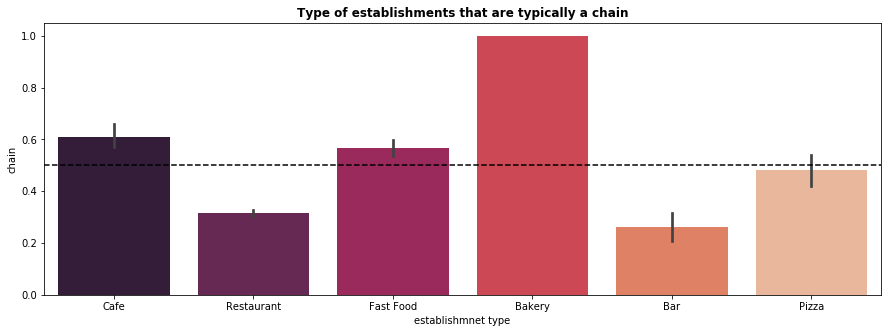

In [18]:
#Now lets visualize the porportion of establishment types that are chains in the current LA market
fig, ax=plt.subplots(figsize=(15,5))
ax = sns.barplot(x="object_type", y="chain", data=resturants, palette="rocket")
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel('establishmnet type')
plt.ylabel('chain')
plt.title('Type of establishments that are typically a chain', fontweight='bold')
plt.show()

We can see that more than 50 percent of cafes, bakaries and fast-food establishments are chains. Thus these can be considered as  typical chain establishments. We also see that all the bakeries in our data are chains, with 100% ratio. 

#### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?<a class="anchor" id="characterizes_chains_seats"></a>

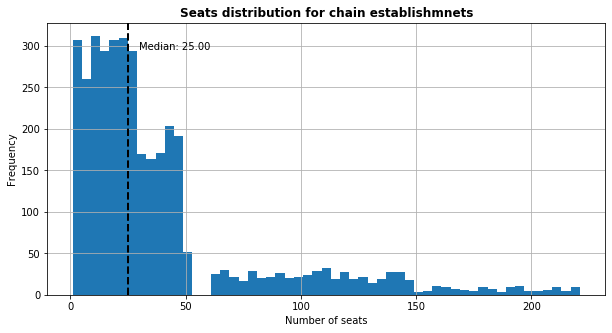

In [19]:
#lets look at the distribution of seats for chain establishmnets
seats=resturants.query('chain== True')
seats.hist('number', bins = 'auto', range=(1,221), figsize=(10,5)) 
plt.axvline(seats['number'].median(), color='k', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
#and lets find the median for our chair distribution and plot it
plt.text(seats['number'].median()*1.2, max_ylim*0.9, 'Median: {:.2f}'.format(seats['number'].median()))
#lets also label the histogram
plt.xlabel('Number of seats')
plt.ylabel('Frequency')
plt.title('Seats distribution for chain establishmnets', fontweight='bold')
plt.show()

The histogram shows us that chains lean towards having many establishments with low number of seats (1 to 50 seats).There is a  median of 25 seats per establishment. 

#### Average number of seats for each type of restaurant. <a class="anchor" id="average_seats"></a>

In [20]:
#lets group the resturants by type and sum total number of seats
number_seats=resturants[['object_type','number']].groupby('object_type').sum().sort_values(by='number').reset_index()
number_seats.columns= ['object_type','number_seats']
#lets merge this with the total number of establishments that we have per establishment type, calculated earliern
average_seats=number_seats.merge(establishment_types, on='object_type',how='left')
#lets only take the columns we need
average_seats=average_seats[['object_type', 'number_seats', 'count' ]]
average_seats.columns= ['object_type','number_seats', 'number_of_establishments']
#now lets calculate the average number of seats per establishment type-relative to thier total number of establishments 
average_seats['average_number_seats']= average_seats['number_seats']/average_seats['number_of_establishments']
average_seats=average_seats.sort_values(by='average_number_seats', ascending=False)
average_seats

,object_type,number_seats,number_of_establishments,average_number_seats
5,Restaurant,348547,7255,48.042316
3,Bar,13072,292,44.767123
4,Fast Food,33939,1066,31.837711
1,Pizza,9107,320,28.459375
2,Cafe,10875,435,25.000000
0,Bakery,6162,283,21.773852


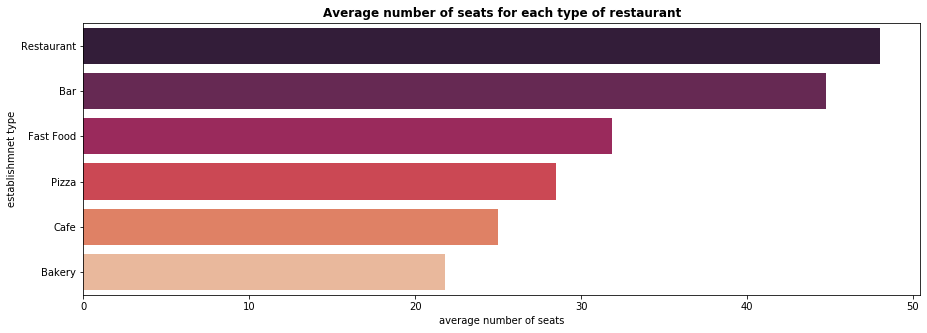

In [21]:
#lets visualize the data
fig, ax=plt.subplots(figsize=(15,5))
ax = sns.barplot(x="average_number_seats", y="object_type", data=average_seats, palette="rocket" )
plt.xlabel('average number of seats')
plt.ylabel('establishmnet type')
plt.title('Average number of seats for each type of restaurant', fontweight='bold')
plt.show()

We can see that on average resturants have the greatest number of seats, closely followed by bars. 

#### Put the data on street names from the address column in a separate column.

In [22]:
#placing separate street name column
resturants['street_name'] = (resturants['address'].replace('(^[0-9]+)','',regex=True).replace('[0-9 #]+$','',regex=True))
resturants.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


#### top ten streets by number of restaurants <a class="anchor" id="top_ten_streets"></a>

In [23]:
#let group our streets and see how many establishments we have for each
restaurants_per_street=resturants.groupby('street_name')['id'].count().reset_index()
restaurants_per_street.columns= ['street_name','number_of_resturants']
#now lets take the top 10 streets(with the most resturants)
top_restaurants_per_street=restaurants_per_street.nlargest(10,'number_of_resturants')
top_restaurants_per_street

,street_name,number_of_resturants
1598,W PICO BLVD,305
1632,W SUNSET BLVD,305
1730,WILSHIRE BLVD,223
429,HOLLYWOOD BLVD,194
1237,SANTA MONICA BLVD,191
1186,S WESTERN AVE,183
914,S FIGUEROA ST,173
1375,W 3RD ST,173
1160,S VERMONT AVE,165
1578,W OLYMPIC BLVD,155


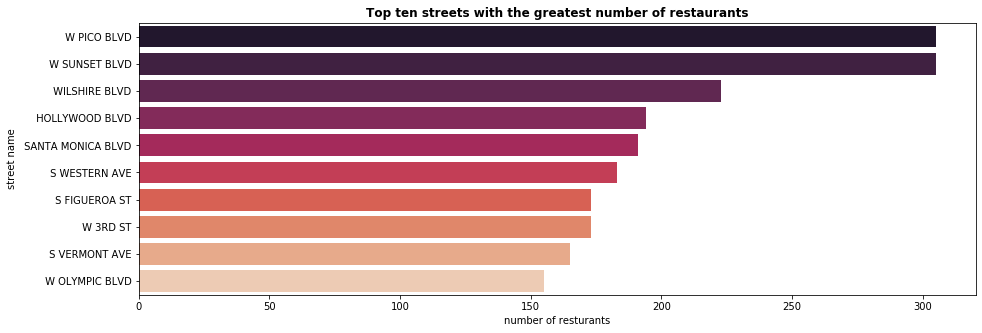

In [24]:
#now lets visualize the data
fig, ax=plt.subplots(figsize=(15,5))
ax = sns.barplot(x="number_of_resturants", y="street_name", data=top_restaurants_per_street, palette="rocket" )
plt.xlabel('number of resturants')
plt.ylabel('street name')
plt.title('Top ten streets with the greatest number of restaurants', fontweight='bold')
plt.show()

The top ten streets contain more than 155 establishments with a max of 305 establishments.

In [25]:
#now lets also look at top 10 streets for cafes only 
cafe_streets= resturants.query('object_type == "Cafe"')
#group our streets and see how many establishments we have for each
cafes_per_street=cafe_streets.groupby('street_name')['id'].count().reset_index()
cafes_per_street.columns= ['street_name','number_of_resturants']
#now lets take the top 10 streets(with the most resturants)
top_cafes_per_street=cafes_per_street.nlargest(10,'number_of_resturants')
top_cafes_per_street

,street_name,number_of_resturants
208,W SUNSET BLVD,21
226,WORLD WAY,15
203,W PICO BLVD,11
220,WILSHIRE BLVD,11
159,SANTA MONICA BLVD,10
54,HOLLYWOOD BLVD,8
217,WESTWOOD BLVD,7
222,WILSHIRE BLVD STE,7
12,BEVERLY BLVD,6
113,S FIGUEROA ST,6


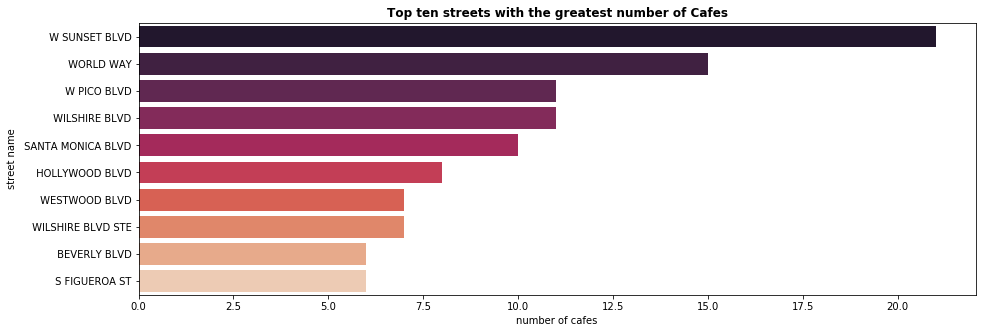

In [26]:
#now lets visualize the data
fig, ax=plt.subplots(figsize=(15,5))
ax = sns.barplot(x="number_of_resturants", y="street_name", data=top_cafes_per_street, palette="rocket" )
plt.xlabel('number of cafes')
plt.ylabel('street name')
plt.title('Top ten streets with the greatest number of Cafes', fontweight='bold')
plt.show()

These ten streets have the most Cafes ranging from 6 establishments to a max of 21 establishments. The company should consider these streets when deciding the location of a cafe. 

#### Find the number of streets that only have one restaurant. <a class="anchor" id="one_restaurant"></a>

In [27]:
#lets see calculate the number of streets with only 1 restaurant 
resturants_one= restaurants_per_street[restaurants_per_street['number_of_resturants']==1].count()
#now lets calculate the total aount of streets
streets_total=restaurants_per_street['street_name'].count()
#and lets find the ratio of streets that have only 1 resturant
one_street_ratio=resturants_one/streets_total
one_street_ratio

street_name             0.662118
number_of_resturants    0.662118
dtype: float64

There are 1213 streets with only 1 resturant, which makes up 66 percent of our streets in total.

#### For streets with a lot of restaurants, look at the distribution of the number of seats <a class="anchor" id="street_seat_distribution"></a>

In [28]:
#lets select the 25 top streets with the highest number of resturants 
restaurants_top_street=restaurants_per_street.nlargest(25, 'number_of_resturants')
restaurants_top_street_list=restaurants_top_street['street_name']
restaurants_top_street_seats=resturants[resturants['street_name'].isin(restaurants_top_street_list)]
restaurants_top_street_seats.head()

,id,object_name,address,chain,object_type,number,street_name
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,WORLD WAY
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD


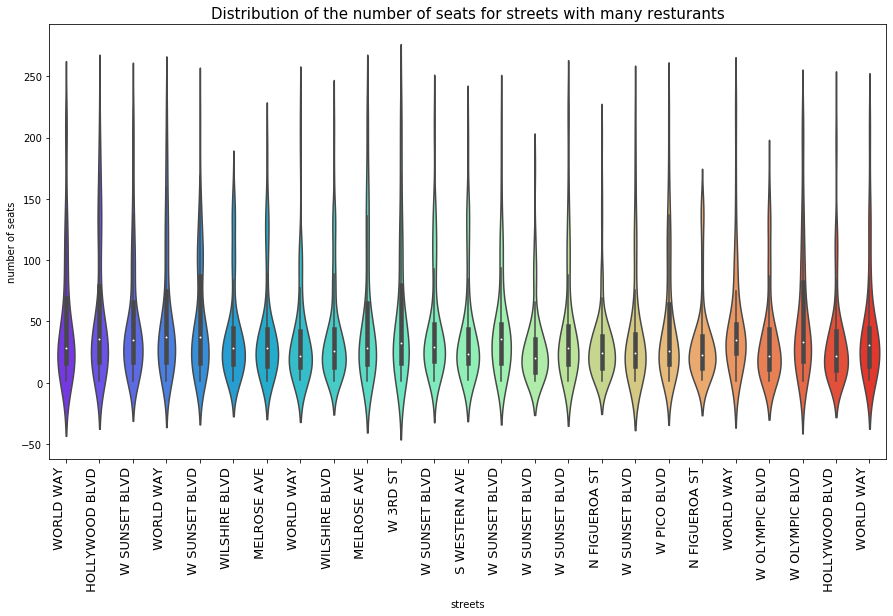

In [29]:
#now lets plot the distrubution of seats for these streets. 
fig, ax=plt.subplots(figsize=(15,8))
sns.violinplot(x="street_name", y="number", data=restaurants_top_street_seats, palette='rainbow') 
ax.set_title('Distribution of the number of seats for streets with many resturants', fontdict={'size':15})
ax.set_ylabel('number of seats')
ax.set_xlabel('streets')
ax.set_xticklabels(restaurants_top_street_seats.street_name,rotation=90,fontdict={'horizontalalignment':'right','size':13});

We can see that most of the restaurants on these streets have less than 50 seats, with the median being less than 50 for all streets. 

#### Overall conclusion<a class="anchor" id="overall_conclusion"></a>

- 75% of the total establishments in LA are resturants and thus the company should consider opening a resturant rather than a cafe
- More than 50 percent of cafes, bakaries and fast-food establishments are chains. Thus if the company still wants to open a cafe, they should consider making this a chain. 
- The average number os seats per cafe is 25, thus the copany should consider this if they open a cafe. 
- The average number of seats per restuant is 48, which should be considered if the company decide to change the initial proposal and open a resturant. 